In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
# def removeOutliers(csvFile):   
#     chart = pd.read_csv(csvFile, sep=',')
#     chart['PortionInf'] = chart['NumInfected']/chart['NumNodes']
#     chart['InfectionProbability'] = chart['InfRate']
#     grouped_df = chart.groupby(by=['InfRate'])
#     res = chart.groupby("InfectionProbability")["NumInfected"].quantile([0.05, 0.95]).unstack(level=1)
#     chart = chart.loc[((res.loc[chart.InfectionProbability, 0.05] < chart.NumInfected.values) 
#                   & (chart.NumInfected.values < res.loc[chart.InfectionProbability, 0.95])).values]
#     chart = chart[['InfectionProbability', 'NumInfected']]
#     chart = chart.groupby('InfectionProbability').mean()
#     return chart;

def removeOutliers(csvFile):   
    chart = pd.read_csv(csvFile, sep=',')
    chart['PortionInf'] = chart['NumInfected']/chart['NumNodes']
    chart['InfectionProbability'] = chart['InfRate']
    grouped_df = chart.groupby(by=['InfRate'])
    res = chart.groupby("InfectionProbability")["NumInfected"].quantile([0.05, 0.95]).unstack(level=1)
    chart = chart.loc[((res.loc[chart.InfectionProbability, 0.05] < chart.NumInfected.values)).values]
    chart = chart[['InfectionProbability', 'NumInfected']]
    chart = chart.groupby('InfectionProbability').mean()
    return chart;

def createChart(csvFile):   
    chart = pd.read_csv(csvFile, sep=',')
    chart['PortionInf'] = chart['NumInfected']/chart['NumNodes']
    chart['InfRate'] = chart['InfRate']/10000
    chart = chart[['InfRate', 'PortionInf']]
    chart = chart.groupby('InfRate').mean()
    return chart;

In [28]:
Newman_GS10_AD5_C02 = createChart('Newman-SIR50-1mil-GS10-AD5-C02.csv')
Newman_GS10_AD5_C04 = createChart('Newman-SIR50-1mil-GS10-AD5-C04.csv')
Newman_GS10_AD5_C06 = createChart('Newman-SIR50-1mil-GS10-AD5-C06.csv')

NewmanC_GS10_AD5_C02 = removeOutliers('Newman-SIR50-1mil-GS10-AD5-C02.csv')
NewmanC_GS10_AD5_C04 = removeOutliers('Newman-SIR50-1mil-GS10-AD5-C04.csv')
NewmanC_GS10_AD5_C06 = removeOutliers('Newman-SIR50-1mil-GS10-AD5-C06.csv')

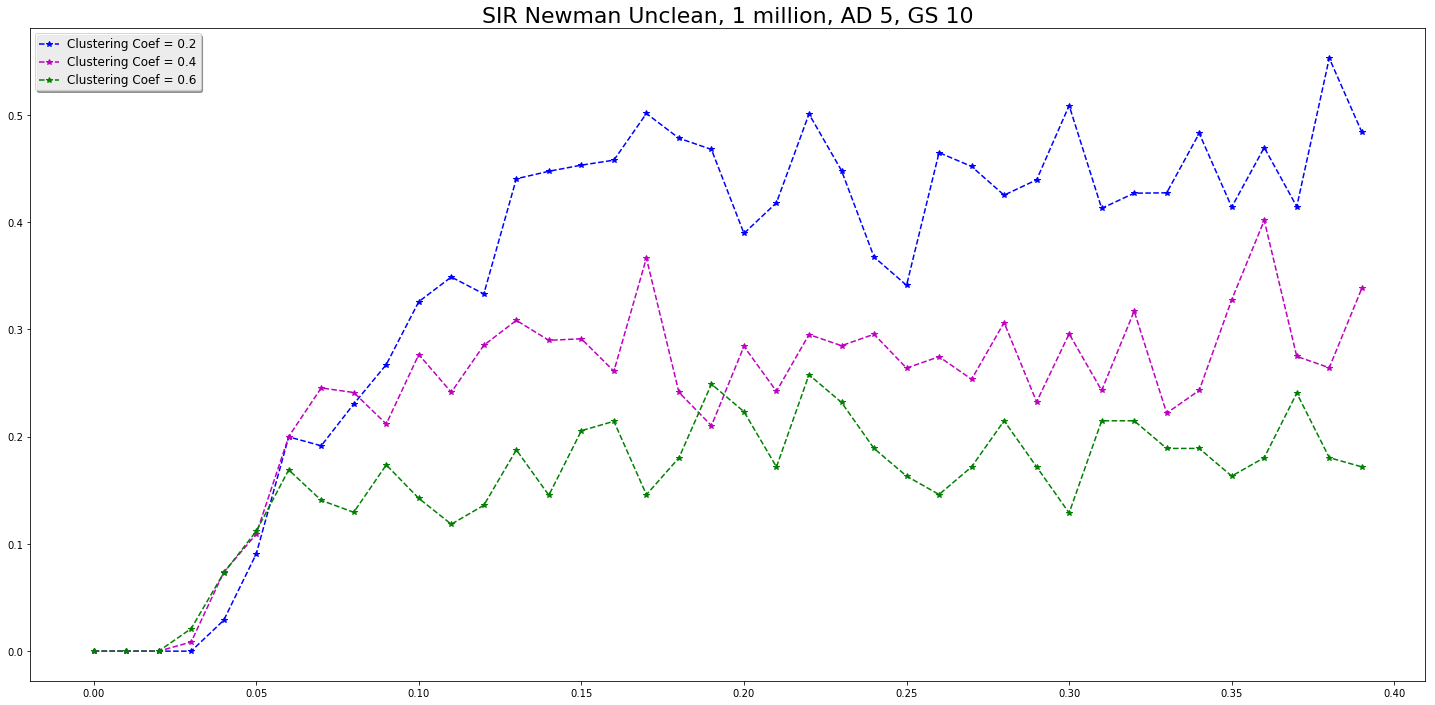

In [33]:
mp.figure(figsize=(25,12))
mp.title('SIR Newman Unclean, 1 million, AD 5, GS 10', fontsize=22)

mp.plot(Newman_GS10_AD5_C02, 'b*--', label='Clustering Coef = 0.2')
mp.plot(Newman_GS10_AD5_C04, 'm*--', label='Clustering Coef = 0.4')
mp.plot(Newman_GS10_AD5_C06, 'g*--', label='Clustering Coef = 0.6')

legend = mp.legend(loc='upper left', shadow=True)
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)
mp.show()

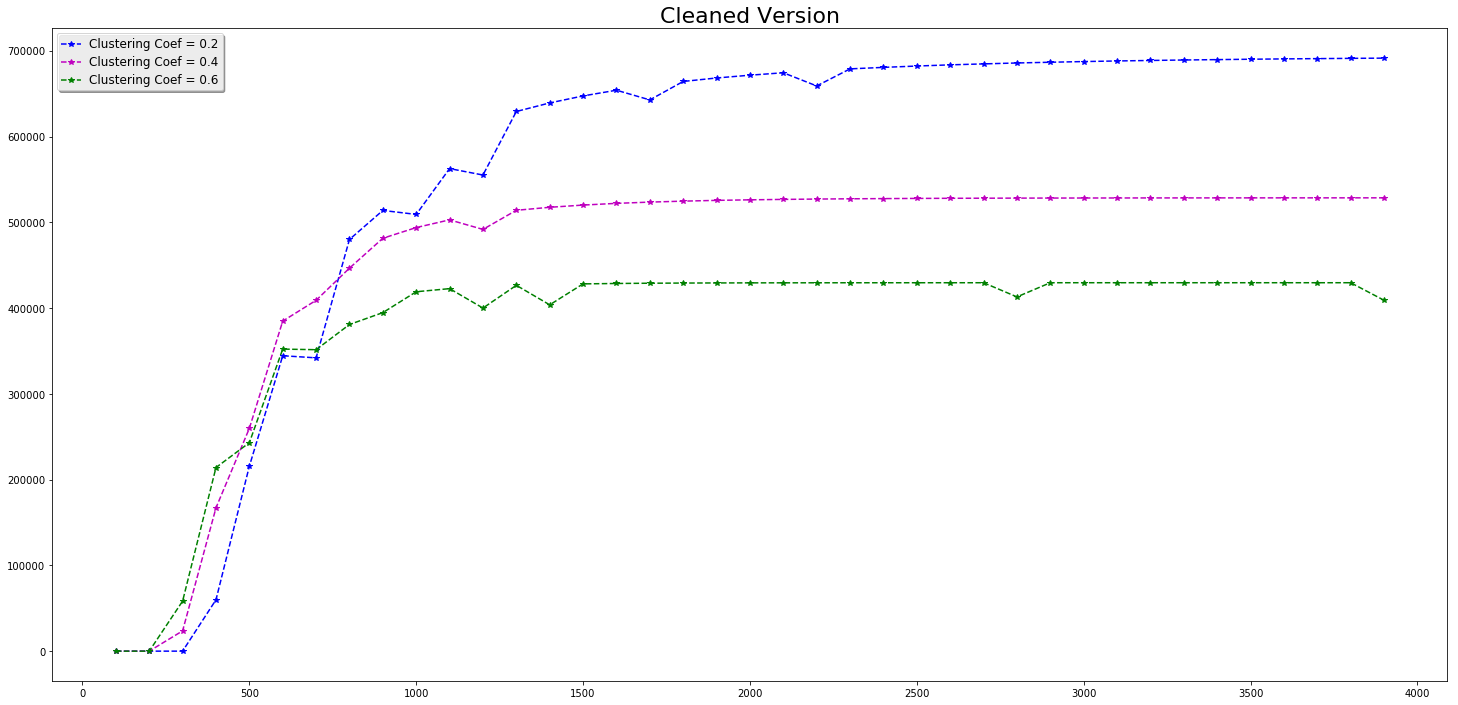

In [32]:
mp.figure(figsize=(25,12))
mp.title('Cleaned Version', fontsize=22)

mp.plot(NewmanC_GS10_AD5_C02, 'b*--', label='Clustering Coef = 0.2')
mp.plot(NewmanC_GS10_AD5_C04, 'm*--', label='Clustering Coef = 0.4')
mp.plot(NewmanC_GS10_AD5_C06, 'g*--', label='Clustering Coef = 0.6')

legend = mp.legend(loc='upper left', shadow=True)
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)
mp.show()